In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import csv

In [2]:
# Load world borders, drop and rename columns, remove Antarctica, 
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world_borders = world.loc[:, ['name', 'pop_est', 'geometry']]
world_borders = world_borders.rename(columns={'name': 'country'})
world_borders = world_borders.drop(world_borders.index[159])

In [3]:
df = pd.read_csv('/home/tobia/Repos/randomstats/ratebeer/beer_data.csv')

In [4]:
# Adjust ratebeer country names to naturalearth_lowres
df.loc[:, 'country'] = df.loc[:, 'country'].str.replace('United States', 'United States of America')
df.loc[:, 'country'] = df.loc[:, 'country'].str.replace('Czech Republic', 'Czechia')
df.loc[:, 'country'] = df.loc[:, 'country'].str.replace('England', 'United Kingdom')
df.loc[:, 'country'] = df.loc[:, 'country'].str.replace('Scotland', 'United Kingdom')
df.loc[:, 'country'] = df.loc[:, 'country'].str.replace('Wales', 'United Kingdom')
df.loc[:, 'country'] = df.loc[:, 'country'].str.replace('Faroe Islands', 'Denmark')
df.loc[:, 'country'] = df.loc[:, 'country'].str.replace('Hong Kong', 'China')

fltr_singapore = df.loc[:, 'country'] == 'Singapore'
df.drop(index=df[fltr_singapore].index, inplace=True)

In [5]:
# Create dict/dataframe with number of beers for each country
plot_dict_count = df.loc[:, 'country'].value_counts()
num_df = pd.DataFrame(plot_dict_count)
num_df = num_df.reset_index()
num_df.columns = ['country', 'num_beers']

In [6]:
# Merge number of beers data df with world borders df
all_data_num = world_borders.set_index('country').join(num_df.set_index('country'))
all_data_num = all_data_num.fillna(0)

In [7]:
# Count beers per million people for each country
all_data_num.loc[:, 'beers_per_mln'] = all_data_num.loc[:, 'num_beers'] / (all_data_num.loc[:, 'pop_est'] / 1000000)

<AxesSubplot:title={'center':'Number of beers per 1 mln inhabitants'}>

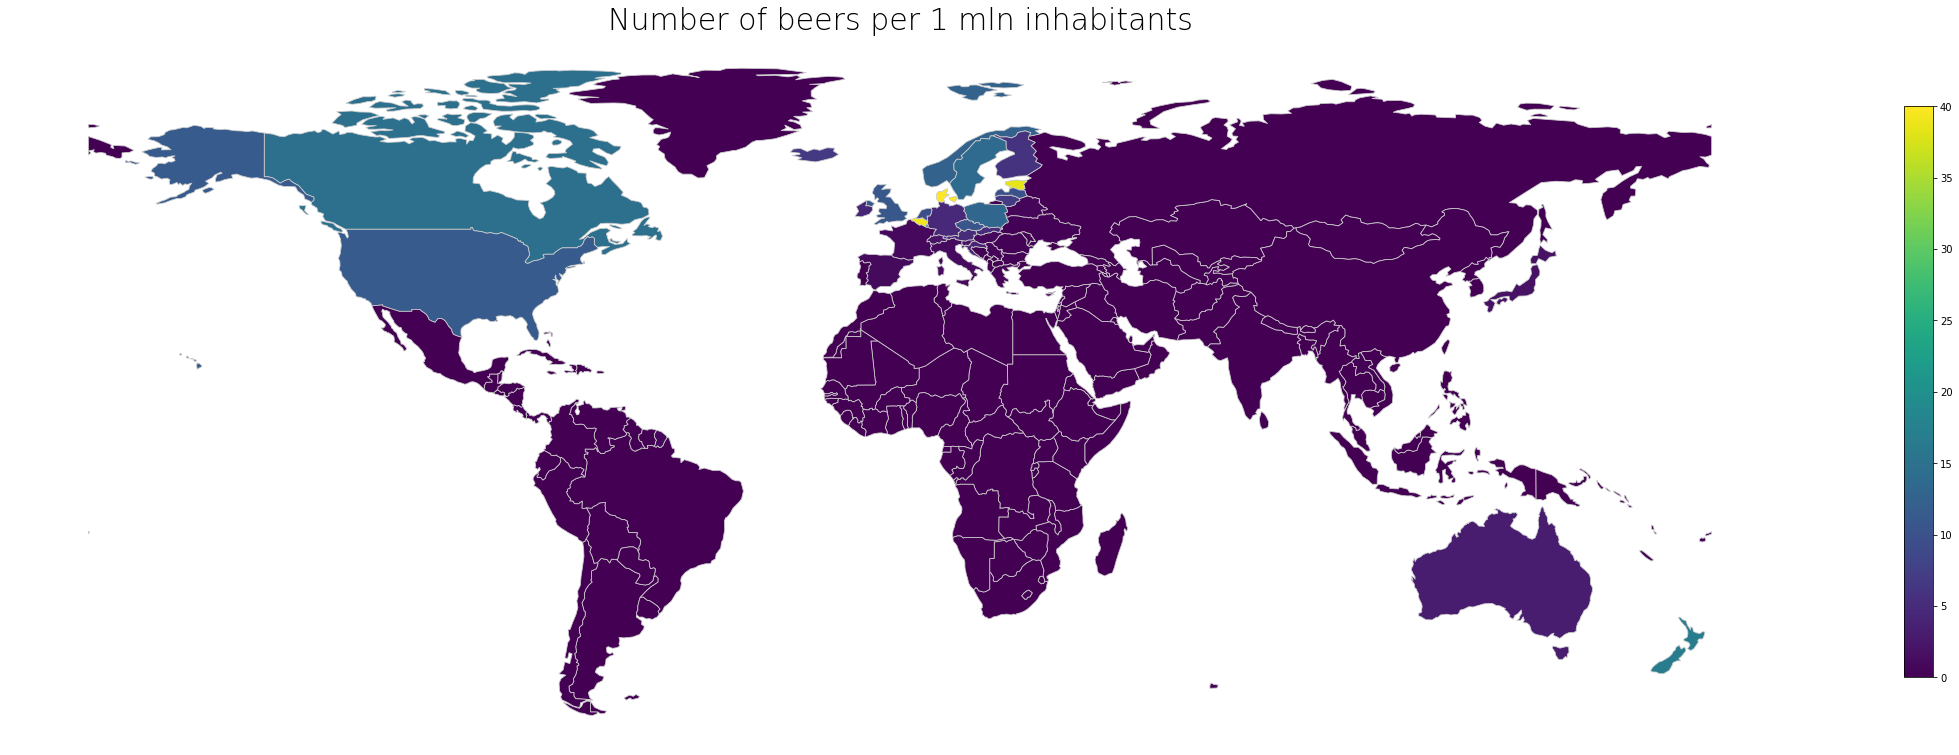

In [8]:
# Create plot for 'beers per million' map
fig, ax = plt.subplots(1, figsize=(40, 35))
ax.axis('off')
ax.set_title('Number of beers per 1 mln inhabitants', fontdict={'fontsize': '30', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=40))
sm._A = []

fig.colorbar(sm, shrink=0.3)
all_data_num.plot(column='beers_per_mln', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:xlabel='country'>

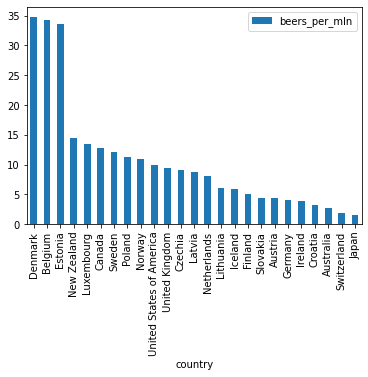

In [9]:
# Create 'beers per million' barplot for top 25
all_data_num_top25 = all_data_num.sort_values('beers_per_mln', ascending=False).head(25)
all_data_num_top25 = all_data_num_top25.reset_index()
ax = all_data_num_top25.loc[:, ['country', 'beers_per_mln']].plot.bar(x='country', y='beers_per_mln')
ax

In [10]:
# Create dict/dataframe with number of points for each country
country_grp = df.groupby(['country'])
pts_per_country = country_grp['points'].sum()
pts_df = pd.DataFrame(pts_per_country)
pts_df = pts_df.reset_index()
pts_df.columns = ['country', 'points']

In [11]:
# Merge points data df with world borders df
all_data_pts = world_borders.set_index('country').join(pts_df.set_index('country'))
all_data_pts = all_data_pts.fillna(0)

In [12]:
# Count points per million people for each country
all_data_pts.loc[:, 'pts_per_mln'] = all_data_pts.loc[:, 'points'] / (all_data_pts.loc[:, 'pop_est'] / 1000000)

<AxesSubplot:title={'center':'Sum of points per 1 mln inhabitants'}>

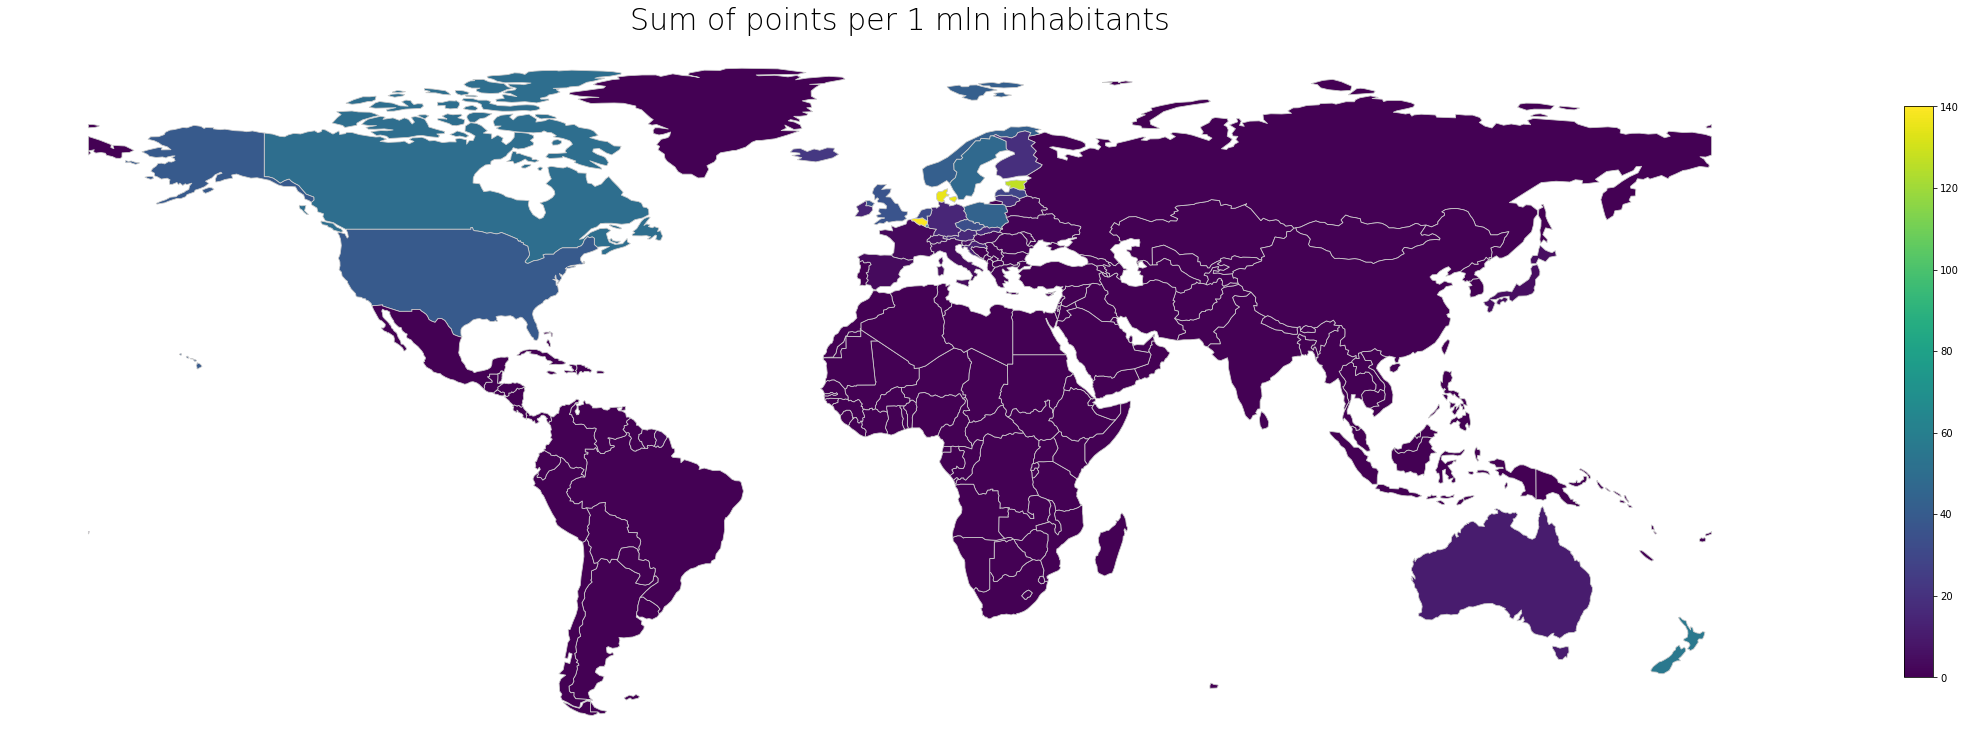

In [13]:
# Create plot for 'pts per million' map
fig, ax = plt.subplots(1, figsize=(40, 35))
ax.axis('off')
ax.set_title('Sum of points per 1 mln inhabitants', fontdict={'fontsize': '30', 'fontweight' : '3'})
sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=0, vmax=140))
sm._A = []

fig.colorbar(sm, shrink=0.3)
all_data_pts.plot(column='pts_per_mln', cmap='viridis', linewidth=0.8, ax=ax, edgecolor='0.8')

<AxesSubplot:xlabel='country'>

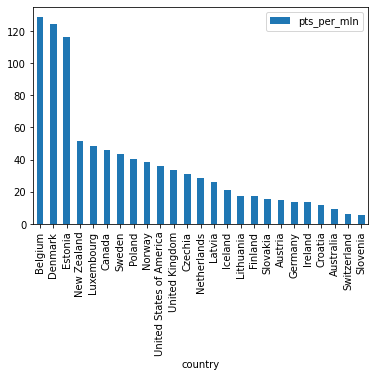

In [14]:
# Create 'points per million' barplot for top 25
all_data_pts_top25 = all_data_pts.sort_values('pts_per_mln', ascending=False).head(25)
all_data_pts_top25 = all_data_pts_top25.reset_index()
ax = all_data_pts_top25.loc[:, ['country', 'pts_per_mln']].plot.bar(x='country', y='pts_per_mln')
ax

In [15]:
# Table with medals for each country based on number of points
style_grp = df.groupby(['style', 'country']).agg(sum)
style_grp = style_grp.sort_values(by=['style', 'points'], ascending=[1, 0])
style_grp = style_grp.reset_index()

styles = []
top_country_style_dict = {'gold': {}, 'silver': {}, 'bronze': {}}
for row in style_grp.iterrows():
    if styles.count(row[1][0]) == 0:
        if row[1][1] not in top_country_style_dict['gold']:
            top_country_style_dict['gold'][row[1][1]] = 1
        else:
            top_country_style_dict['gold'][row[1][1]] += 1
    elif styles.count(row[1][0]) == 1:
        if row[1][1] not in top_country_style_dict['silver']:
            top_country_style_dict['silver'][row[1][1]] = 1
        else:
            top_country_style_dict['silver'][row[1][1]] += 1
    elif styles.count(row[1][0]) == 2:
        if row[1][1] not in top_country_style_dict['bronze']:
            top_country_style_dict['bronze'][row[1][1]] = 1
        else:
            top_country_style_dict['bronze'][row[1][1]] += 1

    styles.append(row[1][0])

medals_df = pd.DataFrame(top_country_style_dict)
medals_df = medals_df.fillna(0)
medals_df['sum'] = medals_df['gold'] + medals_df['silver'] + medals_df['bronze']
medals_df = medals_df.sort_values('sum', ascending=False).astype(int)
medals_df

,gold,silver,bronze,sum
United States of America,94,31,9,134
Canada,2,24,37,63
United Kingdom,11,28,14,53
Poland,3,15,19,37
Denmark,0,12,11,23
Belgium,10,5,6,21
Germany,8,7,4,19
Netherlands,1,0,13,14
Japan,11,0,2,13
Sweden,0,5,7,12


In [16]:
# Top 20 when it comes to number of top beers, sorted by number of beers per million people
all_data_num[['num_beers', 'beers_per_mln']].sort_values('beers_per_mln', ascending=False).head(20)

,num_beers,beers_per_mln
country,,
Denmark,195.0,34.784482
Belgium,393.0,34.199649
Estonia,42.0,33.557556
New Zealand,65.0,14.411372
Luxembourg,8.0,13.465067
Canada,455.0,12.772403
Sweden,120.0,12.047604
Poland,435.0,11.305670
Norway,58.0,10.902163


In [21]:
# Top 20 when it comes to number of points, sorted by number of points per million people
all_data_pts[['points', 'pts_per_mln']].sort_values('pts_per_mln', ascending=False).head(20)

,points,pts_per_mln
country,,
Belgium,1478.64,128.674221
Denmark,696.20,124.189522
Estonia,145.51,116.260953
New Zealand,232.45,51.537283
Luxembourg,28.66,48.238601
Canada,1641.09,46.067391
Sweden,433.28,43.499881
Poland,1556.83,40.462083
Norway,205.35,38.599298
